# Movie Recommender System

In [9]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#read dataset
movie_titles_df = pd.read_csv('data/Movie_Id_Titles')
movie_titles_df.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [11]:
#read dataset
movie_rating_df = pd.read_csv('data/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
movie_rating_df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [12]:
#drop the timestamp column from movie_rating_df dataset
movie_rating_df.drop(['timestamp'], axis=1, inplace=True)
movie_rating_df.head()

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


## Descriptive Statistics

In [13]:
movie_rating_df.describe()

,user_id,item_id,rating
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


In [14]:
movie_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
user_id    100003 non-null int64
item_id    100003 non-null int64
rating     100003 non-null int64
dtypes: int64(3)
memory usage: 2.3 MB


In [15]:
#merge both dataset together
movie_rating_df = pd.merge(left = movie_rating_df, right = movie_titles_df, on = 'item_id')
movie_rating_df.head()

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


In [16]:
#check number of rows and column in the dataset
movie_rating_df.shape

(100003, 4)

In [20]:
movie_rating_df.groupby(by = 'title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


In [21]:
#fetch mean column from the above descriptive statistics
rating_df_mean = movie_rating_df.groupby(by = 'title')['rating'].describe()['mean']
rating_df_mean.head()

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: mean, dtype: float64

In [22]:
#fetch count column from the above descriptive statistics
rating_df_count = movie_rating_df.groupby(by = 'title')['rating'].describe()['count']
rating_df_count.head()

title
'Til There Was You (1997)      9.0
1-900 (1994)                   5.0
101 Dalmatians (1996)        109.0
12 Angry Men (1957)          125.0
187 (1997)                    41.0
Name: count, dtype: float64

In [23]:
#concat both the dataset created in the last 2 steps
rating_mean_count_df = pd.concat([rating_df_mean, rating_df_count], axis=1)
rating_mean_count_df.head()

,mean,count
title,,
'Til There Was You (1997),2.333333,9.0
1-900 (1994),2.600000,5.0
101 Dalmatians (1996),2.908257,109.0
12 Angry Men (1957),4.344000,125.0
187 (1997),3.024390,41.0


In [24]:
#convert the index into column in the final dataset 
rating_mean_count_df.reset_index()

,title,mean,count
0,'Til There Was You (1997),2.333333,9.0
1,1-900 (1994),2.600000,5.0
2,101 Dalmatians (1996),2.908257,109.0
3,12 Angry Men (1957),4.344000,125.0
4,187 (1997),3.024390,41.0
...,...,...,...
1659,Young Guns II (1990),2.772727,44.0
1660,"Young Poisoner's Handbook, The (1995)",3.341463,41.0
1661,Zeus and Roxanne (1997),2.166667,6.0
1662,unknown,3.444444,9.0


## Data visualization 

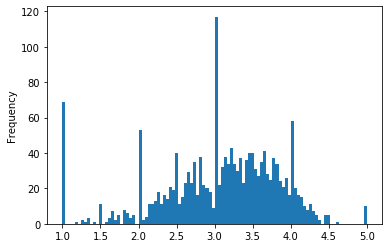

In [26]:
#plot the histogram of mean column of rating_mean_count_df dataset
rating_mean_count_df['mean'].plot(bins=100, kind='hist')

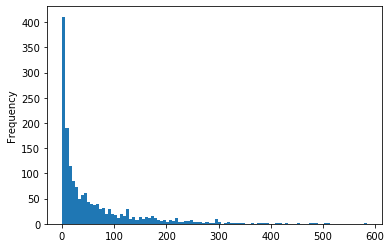

In [27]:
#plot the histogram of count column of rating_mean_count_df dataset
rating_mean_count_df['count'].plot(bins=100, kind='hist')

In [28]:
#check the rating count for the movie with 5 start rating
rating_mean_count_df[rating_mean_count_df['mean'] == 5] 

,mean,count
title,,
Aiqing wansui (1994),5.0,1.0
Entertaining Angels: The Dorothy Day Story (1996),5.0,1.0
"Great Day in Harlem, A (1994)",5.0,1.0
Marlene Dietrich: Shadow and Light (1996),5.0,1.0
Prefontaine (1997),5.0,3.0
"Saint of Fort Washington, The (1993)",5.0,2.0
Santa with Muscles (1996),5.0,2.0
Someone Else's America (1995),5.0,1.0
Star Kid (1997),5.0,3.0


In [29]:
#fetch 100 movies with maximum rating counts
rating_mean_count_df.sort_values('count', ascending=False).head(100)

,mean,count
title,,
Star Wars (1977),4.359589,584.0
Contact (1997),3.803536,509.0
Fargo (1996),4.155512,508.0
Return of the Jedi (1983),4.007890,507.0
Liar Liar (1997),3.156701,485.0
...,...,...
Aladdin (1992),3.812785,219.0
Babe (1995),3.995434,219.0
Volcano (1997),2.808219,219.0


In [31]:
#fetch 200 movies with minimum rating counts
rating_mean_count_df.sort_values('count', ascending=True).head(200)

,mean,count
title,,
Á köldum klaka (Cold Fever) (1994),3.0,1.0
Mille bolle blu (1993),1.0,1.0
Mat' i syn (1997),1.0,1.0
Marlene Dietrich: Shadow and Light (1996),5.0,1.0
"Man from Down Under, The (1943)",1.0,1.0
...,...,...
"Show, The (1995)",3.0,2.0
Men With Guns (1997),3.5,2.0
"Beans of Egypt, Maine, The (1994)",3.5,2.0


In [32]:
#create a dataset showing each user rated which movie
userid_title_matrix = movie_rating_df.pivot_table(index='user_id', columns='title', values='rating')
userid_title_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#check for any random movie, say 'Titanic (1997)'
titanic = userid_title_matrix['Titanic (1997)']
titanic

user_id
0      NaN
1      NaN
2      5.0
3      NaN
4      NaN
      ... 
939    NaN
940    5.0
941    NaN
942    3.0
943    NaN
Name: Titanic (1997), Length: 944, dtype: float64

In [35]:
#check for a movie, say 'Star Wars (1977)'
starwars = userid_title_matrix['Star Wars (1977)']
starwars

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [37]:
#check the correlation between movie Titanic with all other movies
titanic_correlation = pd.DataFrame(userid_title_matrix.corrwith(titanic), columns=['Correlations'])
titanic_correlation

,Correlations
title,
'Til There Was You (1997),-0.062017
1-900 (1994),NaN
101 Dalmatians (1996),0.120113
12 Angry Men (1957),0.077700
187 (1997),0.315654
...,...
Young Guns II (1990),0.317274
"Young Poisoner's Handbook, The (1995)",0.356783
Zeus and Roxanne (1997),NaN


In [38]:
#add count column in the dataset created in the last step
titanic_correlation = titanic_correlation.join(rating_mean_count_df['count'])
titanic_correlation

,Correlations,count
title,,
'Til There Was You (1997),-0.062017,9.0
1-900 (1994),NaN,5.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0
...,...,...
Young Guns II (1990),0.317274,44.0
"Young Poisoner's Handbook, The (1995)",0.356783,41.0
Zeus and Roxanne (1997),NaN,6.0


In [40]:
#drop NA values (if present)
titanic_correlation.dropna(inplace=True)
titanic_correlation

,Correlations,count
title,,
'Til There Was You (1997),-0.062017,9.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0
2 Days in the Valley (1996),0.017295,93.0
...,...,...
Year of the Horse (1997),1.000000,7.0
Young Frankenstein (1974),0.107666,200.0
Young Guns (1988),0.199931,101.0


In [41]:
#sort the above dataset by correlation column
titanic_correlation.sort_values(['Correlations'], ascending=False)

,Correlations,count
title,,
Nadja (1994),1.0,8.0
"Pest, The (1997)",1.0,8.0
"Savage Nights (Nuits fauves, Les) (1992)",1.0,3.0
For Ever Mozart (1996),1.0,3.0
"Jerky Boys, The (1994)",1.0,3.0
...,...,...
Pather Panchali (1955),-1.0,8.0
Angel Baby (1995),-1.0,4.0
Blood Beach (1981),-1.0,6.0


In [42]:
#get rid of movies which has been reviewed less than 80 times
titanic_correlation[titanic_correlation['count']>80].sort_values(['Correlations'], ascending=False)

,Correlations,count
title,,
Titanic (1997),1.000000,350.0
"River Wild, The (1994)",0.497600,146.0
"Abyss, The (1989)",0.472103,151.0
Bram Stoker's Dracula (1992),0.443560,120.0
True Lies (1994),0.435104,208.0
...,...,...
Brazil (1985),-0.243532,208.0
Richard III (1995),-0.275451,89.0
Cold Comfort Farm (1995),-0.307150,125.0


In [59]:
#repeat the above exercise for the movie 'Star Wars (1977)' and returning the top 10 movie recommendations
starwars_correlation = pd.DataFrame(userid_title_matrix.corrwith(starwars), columns=['Correlations'])
starwars_correlation = starwars_correlation.join(rating_mean_count_df['count'])
starwars_correlation.dropna(inplace=True)
starwars_correlation.sort_values(['Correlations'], ascending=False)
starwars_correlation[starwars_correlation['count']>80].sort_values(['Correlations'], ascending=False).head(10)

C:\Users\prtk1\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\prtk1\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlations,count
title,,
Star Wars (1977),1.000000,584.0
"Empire Strikes Back, The (1980)",0.748353,368.0
Return of the Jedi (1983),0.672556,507.0
Raiders of the Lost Ark (1981),0.536117,420.0
Austin Powers: International Man of Mystery (1997),0.377433,130.0
"Sting, The (1973)",0.367538,241.0
Indiana Jones and the Last Crusade (1989),0.350107,331.0
Pinocchio (1940),0.347868,101.0
"Frighteners, The (1996)",0.332729,115.0


In [58]:
userid_title_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#calculate the correlations of all the movies with other movies
movie_correlations = userid_title_matrix.corr(method='pearson', min_periods=80)
movie_correlations

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
#read dataset containing new user ratings
myRatings = pd.read_csv('data/My_Ratings.csv')
myRatings

,Movie Name,Ratings
0,Liar Liar (1997),5
1,Star Wars (1977),1


In [95]:
#recommend movies based on my ratings
similar_movie_list = pd.Series()

for i in range(len(myRatings)):
    similar_movie = movie_correlations[myRatings['Movie Name'][i]].dropna()
    similar_movie = similar_movie.map(lambda x: x*myRatings['Ratings'][i])
    similar_movie_list = similar_movie_list.append(similar_movie)

In [96]:
#display the final recommended movies
similar_movie_list.sort_values(ascending=False, inplace=True)
similar_movie_list.head(10)

Liar Liar (1997)                             5.000000
Con Air (1997)                               2.349141
Pretty Woman (1990)                          2.348951
Michael (1996)                               2.210110
Indiana Jones and the Last Crusade (1989)    2.072136
Top Gun (1986)                               2.028602
G.I. Jane (1997)                             1.989656
Multiplicity (1996)                          1.984302
Grumpier Old Men (1995)                      1.953494
Ghost and the Darkness, The (1996)           1.895376
dtype: float64